In [15]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using PlotlyJS

### Comparison between exact Leverage Scores (LSs) and empirical LSs

magnetic Laplacian

In [36]:
n = 100
p = 0.3
eta = 0.3
cst = 300

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
B = magnetic_incidence_matrix(meta_g);

k = 2188 vs nb edges= 1461
 


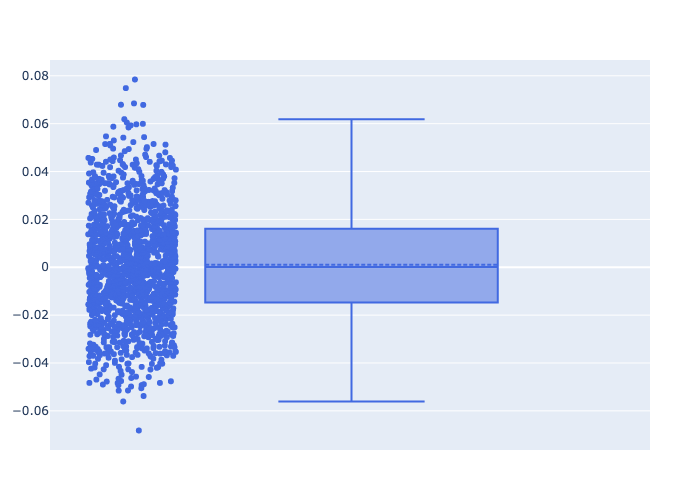

In [41]:
q = 0

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

trace1 = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=20),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)
PlotlyJS.plot(trace1)

k = 2207 vs nb edges= 1461
 


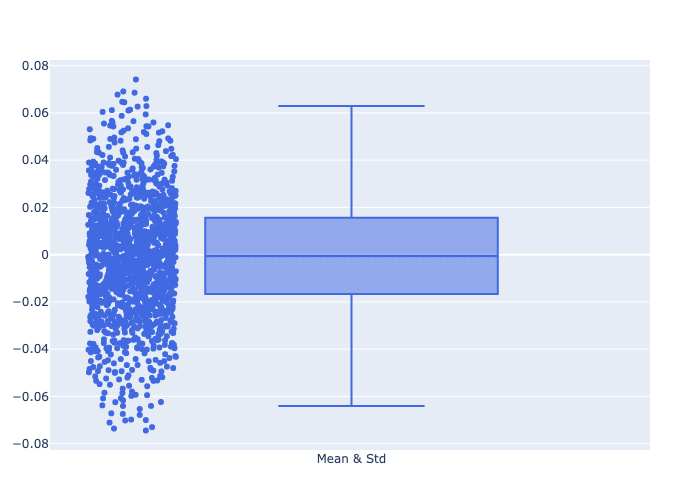

In [42]:
q = 1

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

trace1 = box(y=rel_diff,
boxpoints="all",
quartilemethod="linear",
name="Mean & Std",
marker_color="royalblue",
boxmean=true)
PlotlyJS.plot(trace1)

Empirical estimates

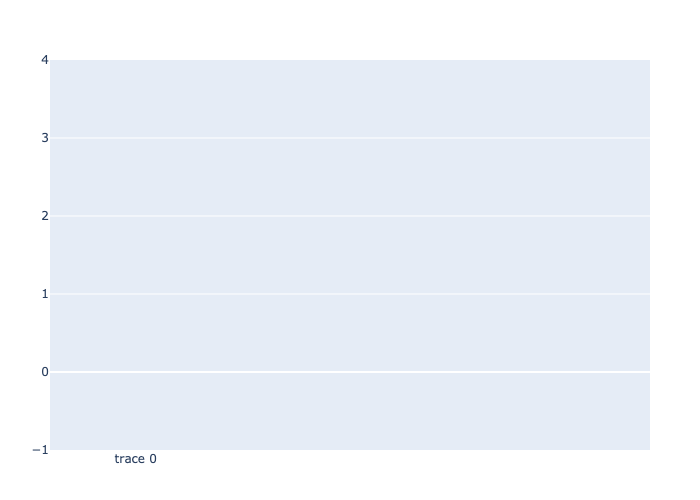

In [44]:
nb_samples = Int(1e2)

q = 0.1
name = "emp-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*"nb_samples"*string(nb_samples)

lev = leverage_score(B, q)
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples)

rel_diff = (lev-emp_lev)./lev;

trace = box(y=rel_diff)
PlotlyJS.plot(trace)


In [45]:
rel_diff

1461×1 Matrix{Float64}:
  0.14388848514537392
  0.6777958659872279
 -0.12776700840806388
  0.15760339324207082
  0.4161982664397753
  0.4043205668054652
 -0.45346625036023197
  0.685095924794672
 -0.5731050060559284
  0.1727610194207006
  ⋮
 -0.4438208275411341
  0.45212506160046145
 -0.3043481632404363
  0.306245085806716
  0.08044850037815207
  0.3011609615961213
  0.1683323973370329
 -0.22783531900203347
 -0.0907482258035922